## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja - vizualizacija skupa podataka

Skup podataka preuzet s https://www.kaggle.com/datasets/mohaiminul101/wisconsin-diagnostic-breast-cancer-wdbc

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp

# Path: main.ipynb

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_initial = pd.read_csv('data.csv')

In [155]:
df_initial.shape

(569, 33)

Inicijalni skup podataka sadrži 569 primjeraka s po 33 atributa

In [156]:
df_initial.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [157]:

df_initial.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

In [158]:
df_initial.drop(['Unnamed: 32'], axis=1, inplace=True)
df_initial.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

#### Normalizacija imena varijabli

In [159]:
df_initial.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'}, inplace=True)

#### Pojašnjenja značajki:
  - **diagnosis** - skupina karcinoma kojoj primjerak pripada - M za maligni, B za benigni (u nastavku 1 za maligni, a 0 za benigni)
  - Za svaki primjerak, za svaku stanicu raka izračunata su sljedeća svojstva, te je zabilježena srednja vrijednost, standardna pogreška i prosjek tri najveće vrijednosti gledajući sve uzorke:
    - **radius** - srednja vrijednost udaljenosti ruba stanice od središta
    - **texture** - standardna devijacija sivih vrijednosti
    - **perimeter** - opseg stanice
    - **area** - površina stanice
    - **smoothness** - lokalna varijaciji u duljini radijusa
    - **compactness** - $opseg^{2}/površina - 1.0$
    - **concavity** - izraženost konkavnih dijelova konture stanice
    - **concave_points** - broj konkavnih dijelova na konturi stanice
    - **symmetry**
    - **fractal_dimension** - $aproksimacija\_obale - 1$
Sve vrijednosti zabilježene su pomoću četiri značajne znamenke
  

In [160]:
df_initial.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [161]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [162]:
df_initial.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

S obzirom na to da su vrijednosti svih atributa osim _id_ i _diagnosis_ realni brojevi (i to rezultati mjerenja), bilo je očekivano da su to pretežito jedinstvene vrijednosti. Za razliku od tih atributa, atribut _id_ je jedinstven za svaki primjerak i ne nosi nikakvu informaciju koja pridonosi klasifikaciji primjerka, pa ga možemo izbaciti.

In [163]:
df = df_initial.copy()
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Regularizacija tipova podataka

Radi lakše klasifikacije, tesktualni tip podataka atributa _diagnosis_ potrebno je pretvoriti u binarni $\newline$
$B \rightarrow 0$, $M \rightarrow 1$

In [164]:
le = pp.LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Nedostajući podatci

In [165]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

U skupu nema nedostajućih podataka, što je i navedeno na izvoru odakle je skup podataka preuzet

### Stršeći podatci

In [166]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Iz pregleda kvartila može se okvirno odrediti potencijalne kandidate za atribute za koje neki primjerci sadrže stršeće podatke. $\newline$ Kao kandidati za detaljniju analizu uzimani su atributi čija je maksimalna vrijednost više od dva puta veća od trećeg kvartila. Za takve atribute, vizualizirana je distribucija korištenjem kutijastog dijagrama te su granice stršećih podataka vizualno određene.

In [167]:
def check_outliers(df, col):
    sns.boxplot(df[col])
    plt.show()

def deal_with_outliers(df, col, limit, method=None):
    if method == 'drop':
        df.drop(df[df[col] > limit].index, inplace=True)
    elif method == 'replace':
        df.loc[df[col] > limit, col] = df[col].mean()
    else:  
        return
    df.reset_index(drop=True, inplace=True)

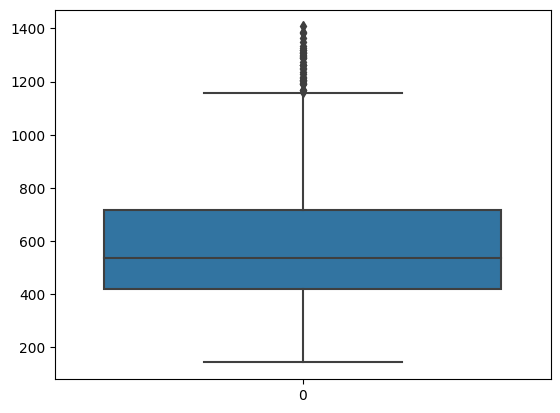

In [192]:
check_outliers(df, 'area_mean')
print((df.radius_se > 1500).sum())
deal_with_outliers(df, 'area_mean', 1500, 'drop')

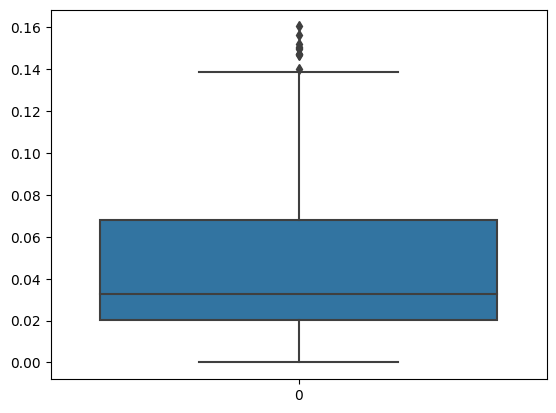

In [169]:
check_outliers(df, 'concave_points_mean')

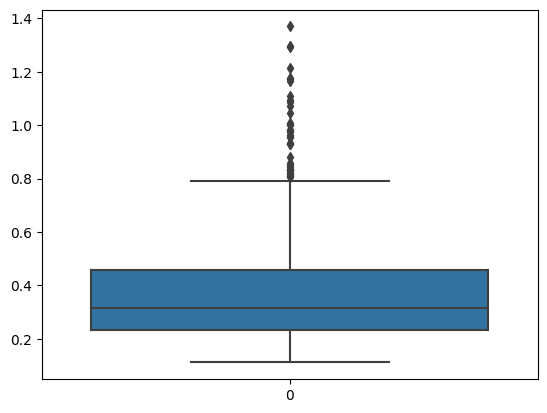

0


In [170]:
check_outliers(df, 'radius_se')
print((df.radius_se > 2).sum())
df.drop(df[df.radius_se > 2].index, inplace=True)
df.reset_index(drop=True, inplace=True)

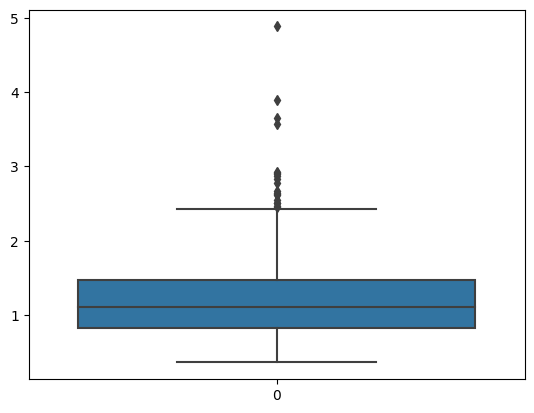

4


In [171]:
check_outliers(df, 'texture_se')
print((df.texture_se > 3).sum())
df.drop(df[df.texture_se > 3].index, inplace=True)
df.reset_index(drop=True, inplace=True)

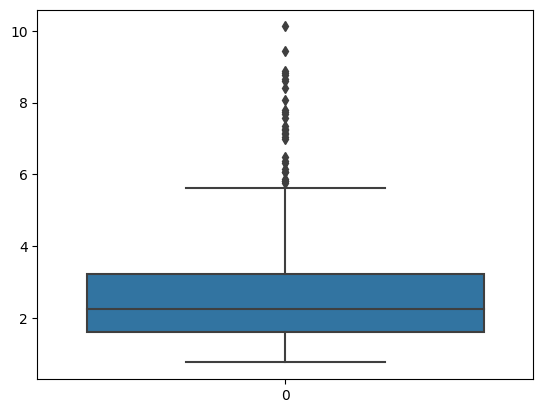

2


In [172]:
check_outliers(df, 'perimeter_se')
print((df.perimeter_se > 9).sum())
df.drop(df[df.perimeter_se > 9].index, inplace=True)
df.reset_index(drop=True, inplace=True)

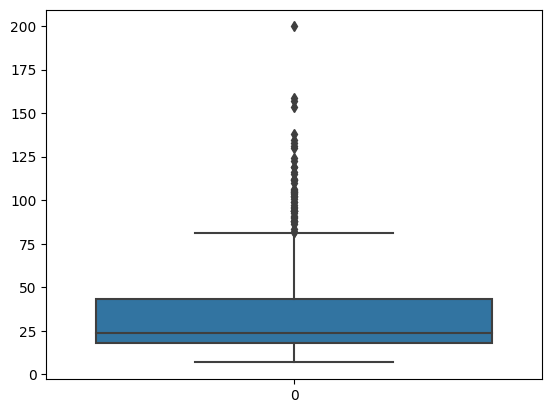

4


In [173]:
check_outliers(df, 'area_se')
print((df.area_se > 150).sum())
df.drop(df[df.area_se > 150].index, inplace=True)
df.reset_index(drop=True, inplace=True)

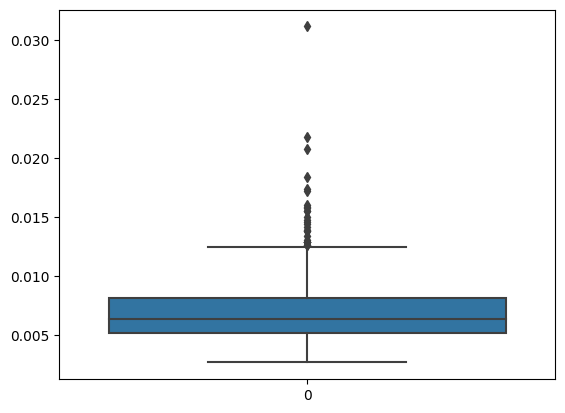

6


In [174]:
check_outliers(df, 'smoothness_se')
print((df.smoothness_se > 0.017).sum())
df.drop(df[df.smoothness_se > 0.017].index, inplace=True)
df.reset_index(drop=True, inplace=True)

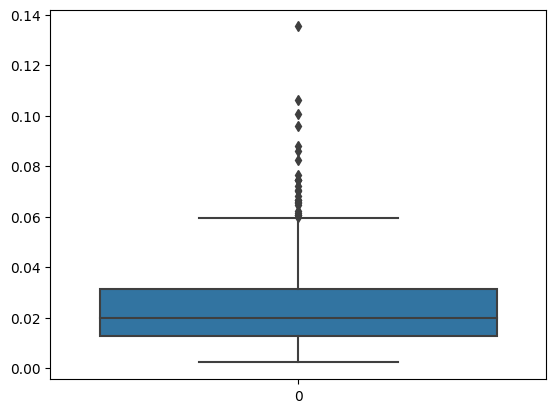

3


In [175]:
check_outliers(df, 'compactness_se')
print((df.compactness_se > 0.1).sum())
df.drop(df[df.compactness_se > 0.1].index, inplace=True)
df.reset_index(drop=True, inplace=True)

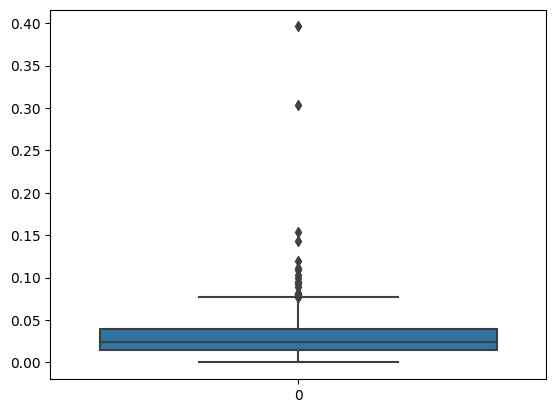

3


In [176]:
check_outliers(df, 'concavity_se')
print((df.concavity_se > 0.15).sum())
df.drop(df[df.concavity_se > 0.12].index, inplace=True)
df.reset_index(drop=True, inplace=True)

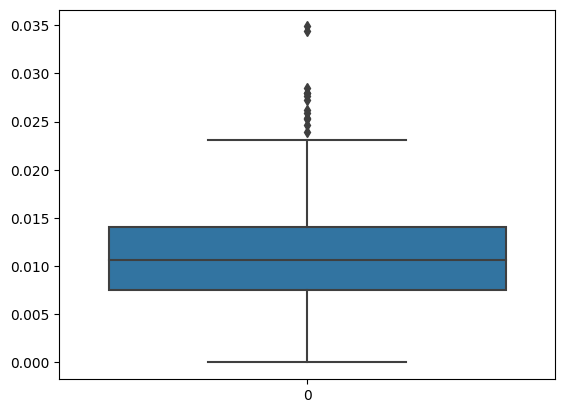

2


In [177]:
check_outliers(df, 'concave_points_se')
print((df.concave_points_se > 0.03).sum())
df.drop(df[df.concave_points_se > 0.03].index, inplace=True)
df.reset_index(drop=True, inplace=True)

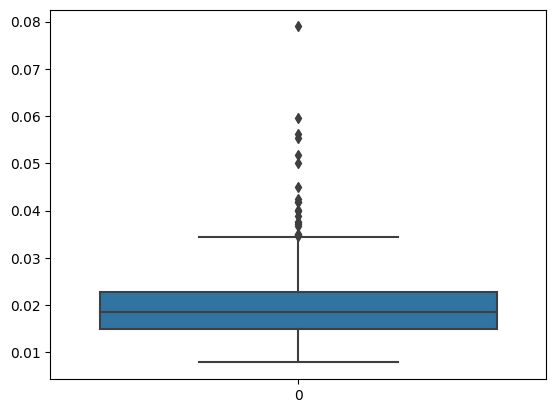

6


In [178]:
check_outliers(df, 'symmetry_se')
print((df.symmetry_se > 0.05).sum())
df.drop(df[df.symmetry_se > 0.05].index, inplace=True)
df.reset_index(drop=True, inplace=True)

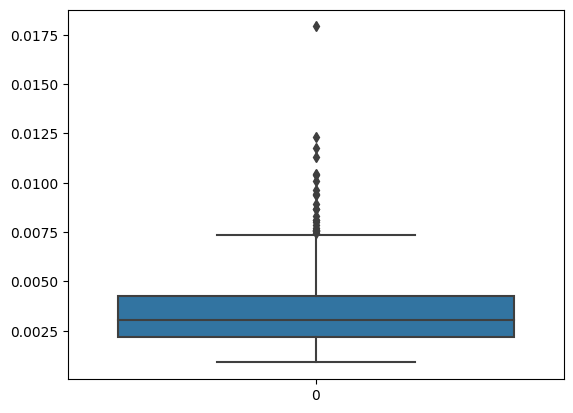

2


In [179]:
check_outliers(df, 'fractal_dimension_se')
print((df.fractal_dimension_se > 0.012).sum())
df.drop(df[df.fractal_dimension_se > 0.012].index, inplace=True)
df.reset_index(drop=True, inplace=True)

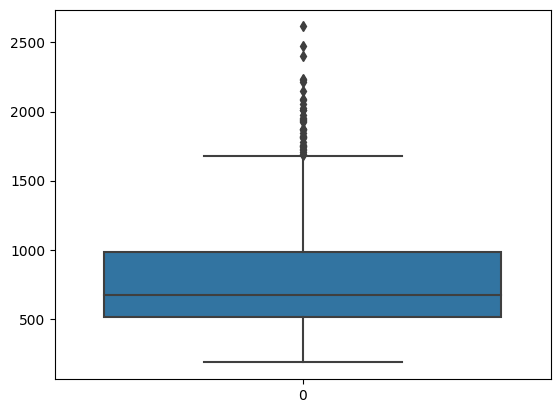

6


In [180]:
check_outliers(df, 'area_worst')
print((df.area_worst > 2200).sum())
df.drop(df[df.area_worst > 2200].index, inplace=True)
df.reset_index(drop=True, inplace=True)

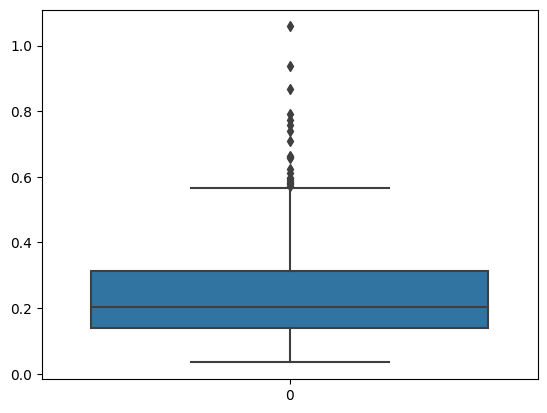

3


In [181]:
check_outliers(df, 'compactness_worst')
print((df.compactness_worst > 0.8).sum())
df.drop(df[df.compactness_worst > 0.8].index, inplace=True)
df.reset_index(drop=True, inplace=True)

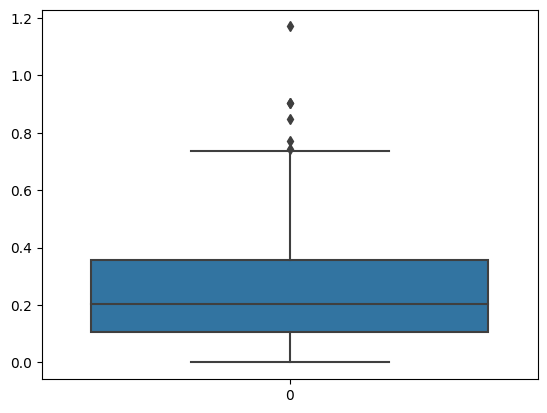

1


In [182]:
check_outliers(df, 'concavity_worst')
print((df.concavity_worst > 1.0).sum())
df.drop(df[df.concavity_worst > 1.0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Nakon izbacivanja stršećih podataka, od inicijalnih 569 primjeraka, preostali broj primjeraka je:

In [183]:
len(df)

512

## Vizualizacija skupa podataka

In [184]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.00000,512.000000,512.000000,512.000000,512.000000,512.00000,512.000000
mean,0.333984,13.774852,19.058262,89.373789,613.183984,0.095543,0.096946,0.075972,0.043644,0.179092,0.062216,0.361824,1.169877,2.539089,33.315449,0.006811,0.022662,0.027417,0.010962,0.019592,0.003438,15.728910,25.394902,103.247793,805.64375,0.131634,0.237836,0.246699,0.107285,0.28657,0.082590
std,0.472095,2.997964,4.199151,20.525388,277.133717,0.013604,0.044337,0.063813,0.032995,0.025114,0.006063,0.194139,0.483538,1.346000,25.470907,0.002464,0.013264,0.018325,0.004923,0.006254,0.001745,4.011132,5.953130,27.468594,428.31711,0.022017,0.136467,0.180558,0.059547,0.05367,0.015990
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,0.114400,0.360200,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.20000,0.081250,0.034320,0.000000,0.000000,0.15650,0.055040
25%,0.000000,11.707500,16.020000,75.135000,420.300000,0.085828,0.062315,0.027115,0.019435,0.161475,0.057688,0.224925,0.815000,1.558750,17.485000,0.005094,0.012555,0.014313,0.007443,0.014998,0.002203,13.002500,20.910000,84.057500,514.97500,0.116200,0.139775,0.106150,0.062960,0.25015,0.070945
50%,0.000000,13.200000,18.635000,85.450000,538.150000,0.094915,0.085765,0.053910,0.030865,0.177900,0.061300,0.306000,1.072500,2.180000,23.265000,0.006244,0.019085,0.023330,0.010435,0.018520,0.003005,14.785000,25.210000,96.475000,666.75000,0.131100,0.204250,0.201400,0.093205,0.28080,0.079220
75%,1.000000,15.272500,21.562500,100.225000,716.600000,0.104125,0.123025,0.111250,0.064388,0.194050,0.065693,0.431675,1.435250,3.056500,39.862500,0.008011,0.030515,0.038297,0.013710,0.022615,0.004227,17.730000,29.252500,117.750000,968.52500,0.144925,0.310175,0.358225,0.151425,0.31515,0.090762
max,1.000000,21.610000,39.280000,144.400000,1407.000000,0.163400,0.283200,0.318900,0.156200,0.304000,0.095020,1.214000,2.927000,8.758000,137.900000,0.016040,0.074710,0.111400,0.028530,0.044990,0.011780,26.680000,49.540000,179.100000,2145.00000,0.222600,0.772500,0.903400,0.290300,0.55580,0.148600


0    341
1    171
Name: diagnosis, dtype: int64


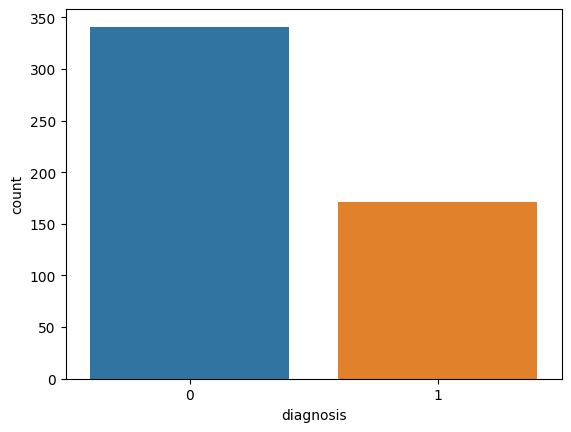

In [185]:
sns.countplot(df, x='diagnosis')
print(df.diagnosis.value_counts())

Skup podataka očito je nebalansiran, s približno dva puta više primjeraka benignih tumora

### Ispitivanje korelacije
Sljedeća korisna stvar je izračunati korelaciju pojedinih atributa (zbog velikog broja atributa, anotacije s brojčanom vrijednosti korelacije zaokružene su na jedno decimalno mjesto):

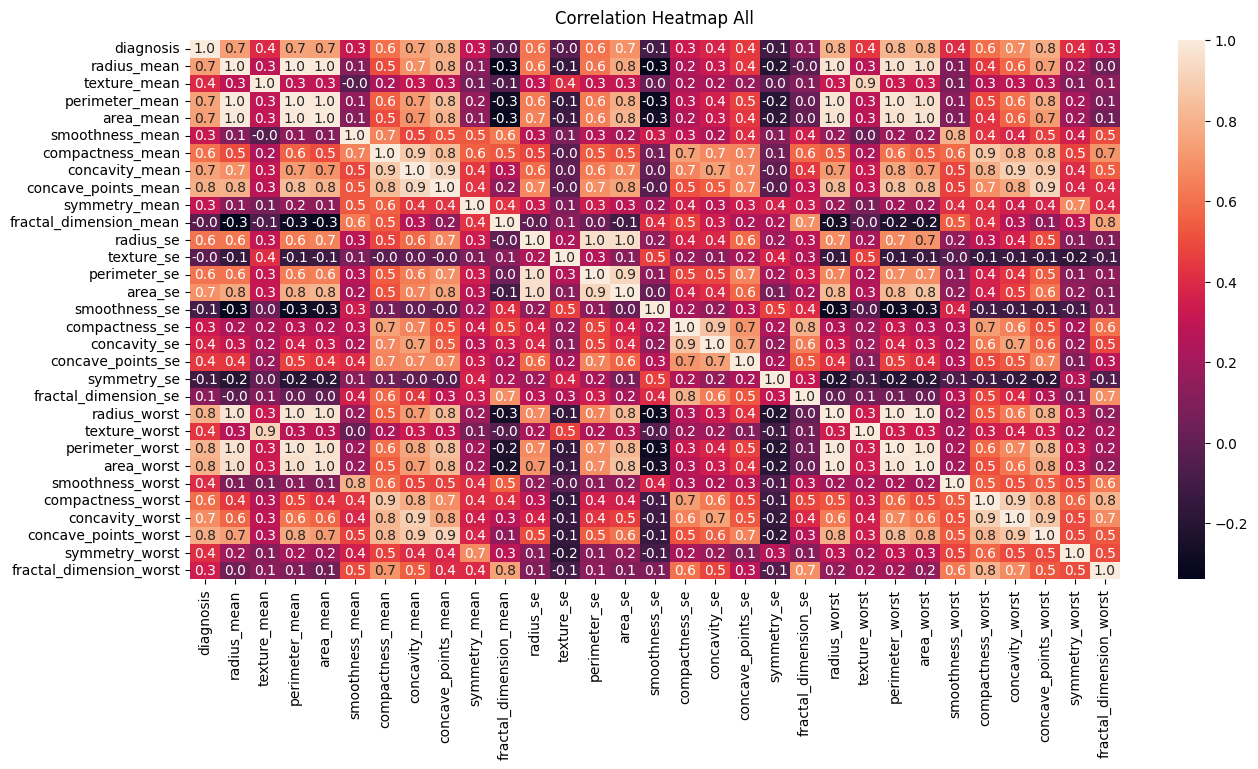

In [186]:
heatmap = sns.heatmap(df.corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')
heatmap.set_title('Correlation Heatmap All', fontdict={'fontsize': 12}, pad=12)
heatmap.figure.set_size_inches(15, 7)


Veličina _diagnosis_ (koju ćemo pokušavati predvidjeti pomoću ostalih atributa) visoko je korelirana s veličinama _radius_, _perimeter_, _area_, _compactness_, _concavity_ i _concave\_points_ i to primarno u grupama atributa _mean_ i _worst_. Ti atributi bit će primarni kandidati za treniranje algoritma strojnog učenja.

Text(0.5, 1.0, 'Correlation radius-perimeter-area')

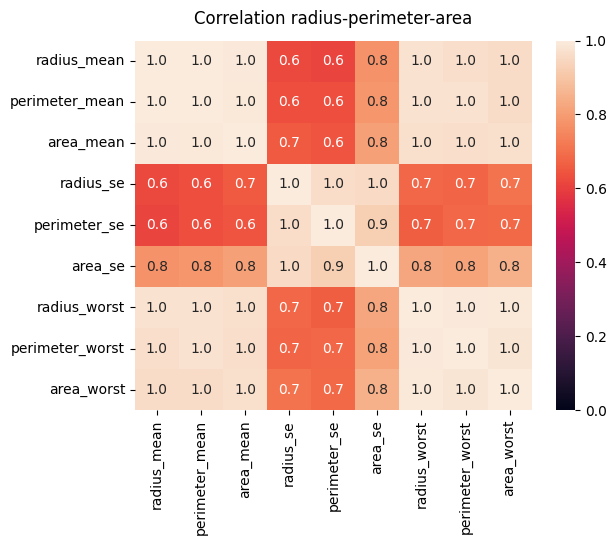

In [187]:
heatmap = sns.heatmap(df.filter(regex="radius.*|perimeter.*|area.*").corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation radius-perimeter-area', fontdict={'fontsize':12}, pad=12)

Vidljiva je gotovo savršena korelacija atributa _radius\_mean_, _perimeter\_mean_ i _area\_mean_ (gornji lijevi kut), što je i očekivano, s obzirom na to da su slike stanica kružnog oblika i opseg i površina direktno ovise o radijusu stanice. Analogno, korelacija je prisutna za iste tri veličine i unutar grupe _worst_ (donji desni kut), te je korelacija za te tri veličine prisutna i između grupa _mean_ i _worst_ (krajevi sporedne dijagonale). $\newline$
Slično, atributi _radius\_se_, _perimeter\_se_ i _area\_se_ korelirani su međusobno (sredina dijagrama), ali značajno manje s tim veličinama iz preostale dvije grupe (_mean_ i _worst_). $\newline$ 

Text(0.5, 1.0, 'Correlation compactness-concavity-concave_points')

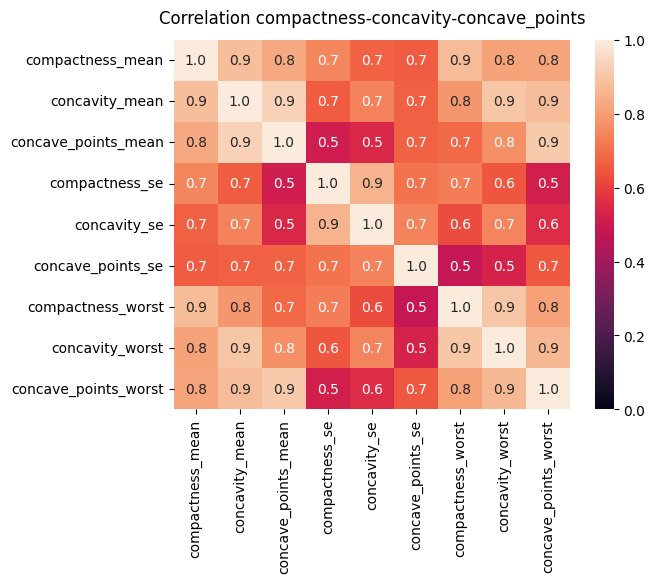

In [188]:
heatmap = sns.heatmap(df.filter(regex="compactness.*|concavity.*|concave_points.*").corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation compactness-concavity-concave_points', fontdict={'fontsize':12}, pad=12)

Vrlo slično zapažanje prethodnom, ali nešto manje izraženo, vidljivo je i za veličine _compactness_, _concavity_ i _concave\_points_ $\newline$

Text(0.5, 1.0, 'Correlation mean-worst')

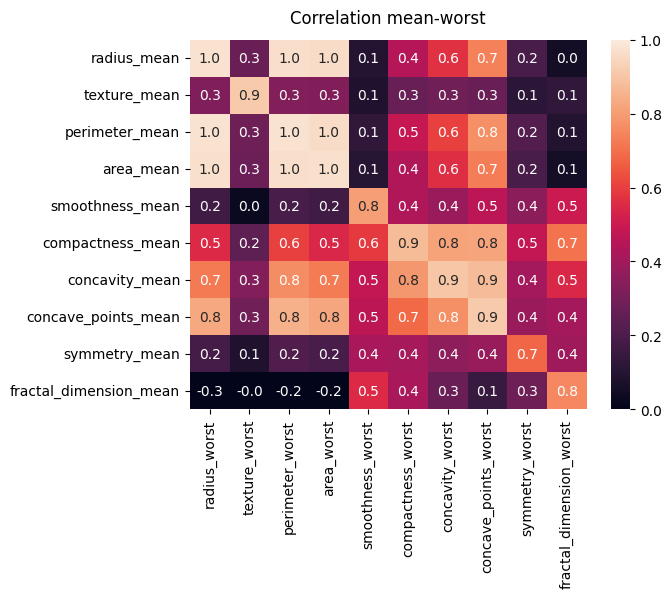

In [189]:
heatmap = sns.heatmap(df.corr().filter(regex=".*mean",axis=0).filter(regex=".*worst",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation mean-worst', fontdict={'fontsize':12}, pad=12)

Generalno, za svaku pojedinu mjerenu veličinu postoji relativno visoka korelacija među grupama _mean_ i _worst_ (glavna dijagonala).

Text(0.5, 1.0, 'Correlation mean-se')

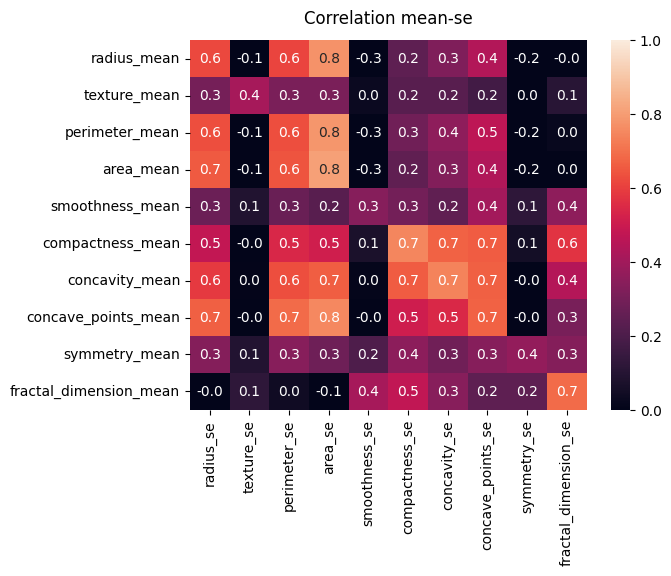

In [190]:
heatmap = sns.heatmap(df.corr().filter(regex=".*mean",axis=0).filter(regex=".*se",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation mean-se', fontdict={'fontsize':12}, pad=12)

Za većinu veličina (izuzev _texture_, _smoothness_ i _symmetry_) postoji i relativno visoka korelacija među grupama _mean_ i _se_.

Text(0.5, 1.0, 'Correlation se-worst')

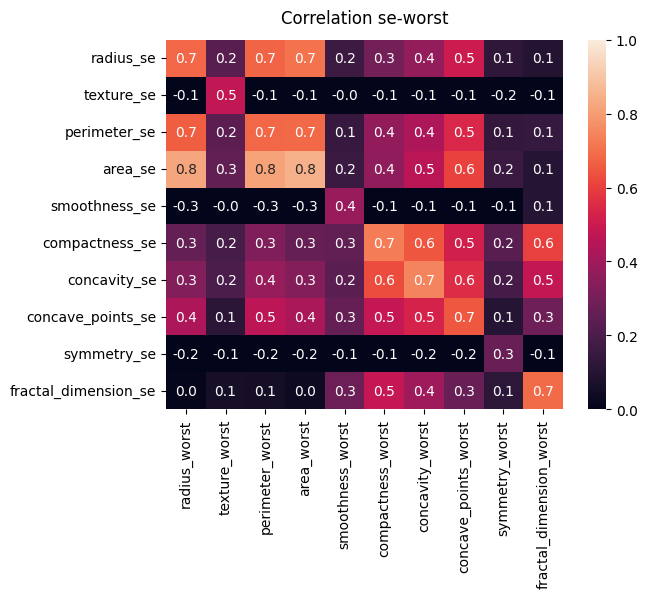

In [191]:
heatmap = sns.heatmap(df.corr().filter(regex=".*se",axis=0).filter(regex=".*worst",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation se-worst', fontdict={'fontsize':12}, pad=12)

Ponovno, za većinu veličina (izuzev _texture_, _smoothness_ i _symmetry_) postoji i relativno visoka korelacija među grupama _se_ i _worst_.

Daje se zaključiti da su mjerene veličine generalno visoko korelirane s istim tim mjerenim veličinama iz različitih grupa (_mean_, _se_ i _worst_) i da će za tereniranje modela strojnog učenja biti korisno ispitati korištenje samo pojedinih grupa veličina radi smanjenja dimenzionalnosti modela.